In [1]:
from utils.plot_metrics import display_metrics, display_best_performance_barchart

scaler_studies = {
    "None": "saves/phase1/ablation/scaling/none/epoch_12",
    "Robust": "saves/phase1/ablation/scaling/robust/epoch_26",
    "Standard": "saves/phase1/objectives/CLIP_MSE/epoch_27",
    "Both": "saves/phase1/ablation/scaling/both/epoch_22",
}
delay_studies = {
    "no delay": "saves/phase1/ablation/delay/0_0/epoch_21",
    "0.15s": "saves/phase1/ablation/delay/0_15/epoch_26",
    "0.30s": "saves/phase1/ablation/delay/0_30/epoch_26",
    "0.45s": "saves/phase1/ablation/delay/0_45/epoch_24",
}

baseline_studies = {
    "no correction": "saves/phase1/ablation/baseline_corr/baseline_none/epoch_26",
    "0.5s": "saves/phase1/ablation/delay/0_15/epoch_26",
    "5s": "saves/phase1/ablation/baseline_corr/baseline_5_sec/epoch_24",
    "10s": "saves/phase1/ablation/baseline_corr/baseline_10_sec/epoch_20",
}

clipping_studies = {
    "no clpping": "saves/phase1/ablation/clipping/none/epoch_26",
    "10std": "saves/phase1/ablation/clipping/10std/epoch_21",
    "20std": "saves/phase1/ablation/delay/0_15/epoch_26",
    "30std": "saves/phase1/ablation/clipping/30std/epoch_23",
    "40std": "saves/phase1/ablation/clipping/40std/epoch_27",
}

band_pass_studies = {
    "(0.5, None), 100Hz": "saves/phase1/ablation/bandpass/none/epoch_22",
    "(0.5, 40), 100Hz": "saves/phase1/ablation/bandpass/40/epoch_27",
    "(0.5, 80), 100Hz": "saves/phase1/ablation/clipping/none/epoch_26",
    "(0.5, 100), 100Hz": "saves/phase1/ablation/bandpass/100/epoch_25",
    "(0.5, 40), 200Hz": "saves/phase1/ablation/downsample200/40/epoch_19",
    "(0.5, 80), 200Hz": "saves/phase1/ablation/downsample200/80/epoch_23",
    "(0.5, 100), 200Hz": "saves/phase1/ablation/downsample200/100/epoch_24",
}

# # Using a moving average window of 5 to smooth the curves
# display_metrics(
#     studies,
#     train_metrics=["accuracy", "top_5_accuracy", "top_10_accuracy"],
#     test_metrics=["accuracy", "top_5_accuracy", "top_10_accuracy"],
#     smooth_window=1,
#     test_subset="unseen_task",
# )

/home/ubuntu/brain-decoding/utils/plot_metrics.py:330: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(metrics_path)


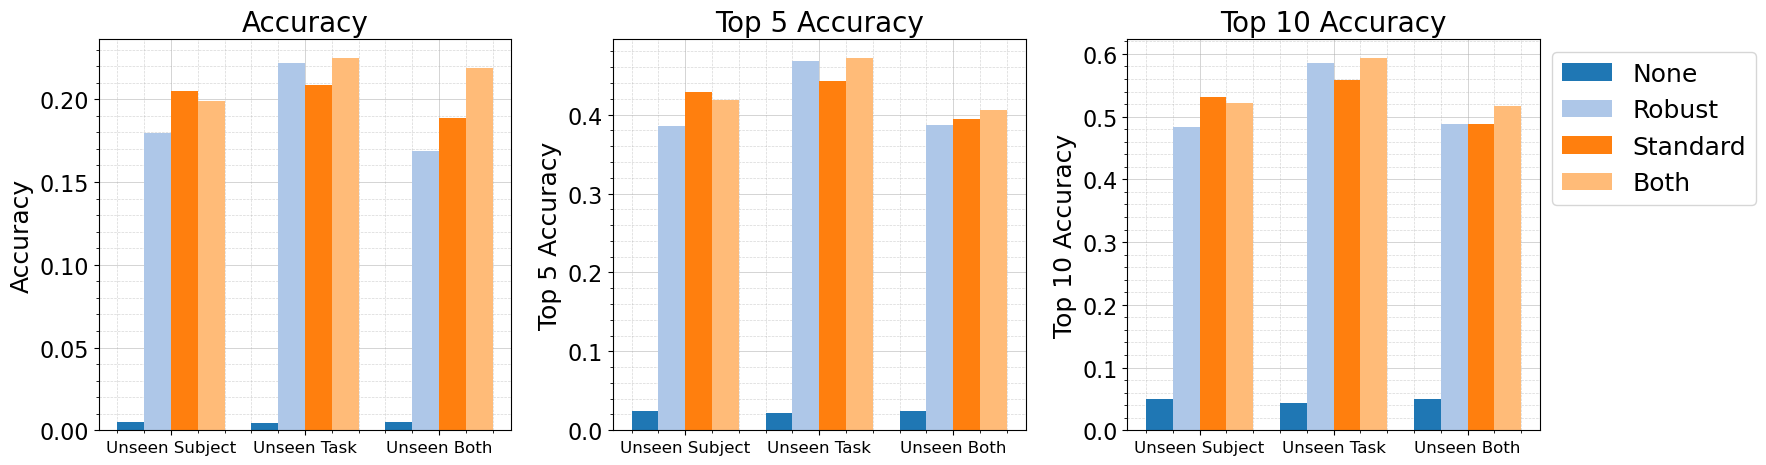

In [2]:
display_best_performance_barchart(
    scaler_studies,
    test_metrics=["accuracy", "top_5_accuracy", "top_10_accuracy"],
    test_subsets=["unseen_subject", "unseen_task", "unseen_both"],
)

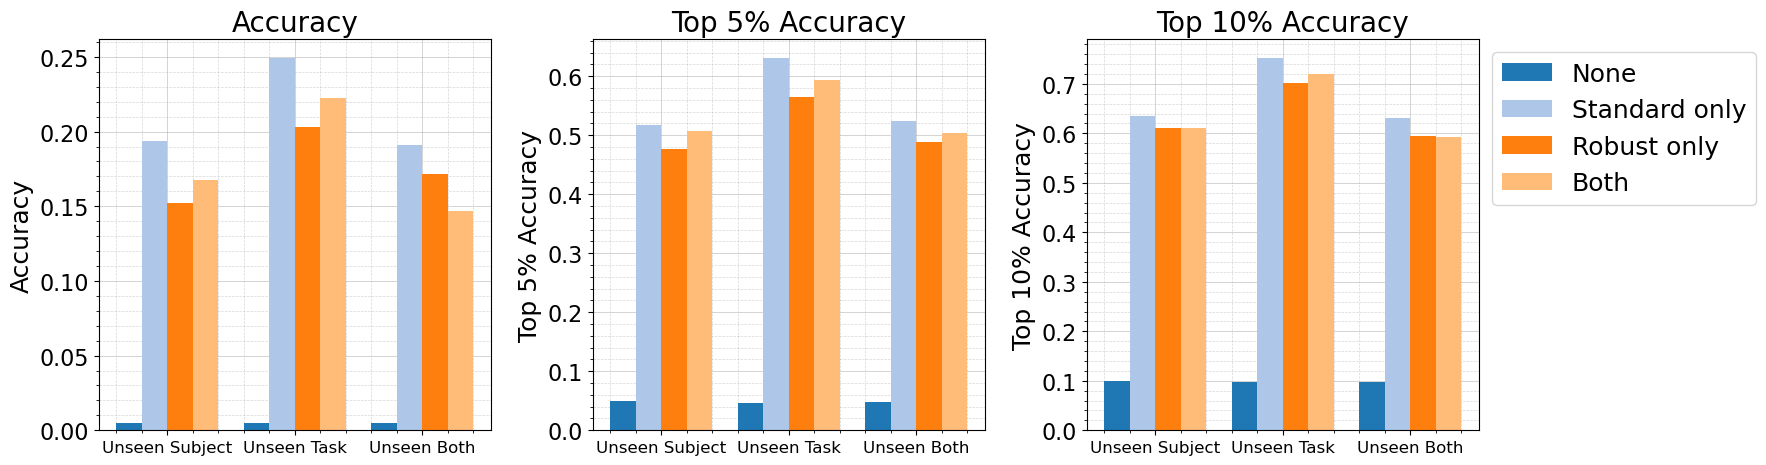

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator


def enable_fine_grid(ax):
    """Enable major and minor axis grid"""
    ax.grid(True, which="major", linestyle="-", linewidth=0.5, alpha=0.75)
    ax.grid(True, which="minor", linestyle="--", linewidth=0.5, alpha=0.5)

    # Turn on minor ticks for both axes
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_custom_barchart(
    data: dict,
    test_metrics: list,
    test_subsets: list,
):
    """
    Given a dictionary of results for multiple "studies" (e.g., 'None (BN)', 'Standard', 'Robust', 'Both'),
    plots a grouped bar chart for each metric across the specified test subsets.

    Parameters:
    -----------
    data : dict
        Nested dictionary of the form:
        {
          "StudyName": {
              "unseen_subject": {"Accuracy": float, "top_1": float, "top_5": float, "top_10": float},
              "unseen_task":    {"Accuracy": float, "top_1": float, "top_5": float, "top_10": float},
              "unseen_both":    {"Accuracy": float, "top_1": float, "top_5": float, "top_10": float}
          },
          ...
        }
    test_metrics : list of str
        The metrics you want to plot, e.g. ["Accuracy", "top_1", "top_5", "top_10"].
    test_subsets : list of str
        The category subsets, e.g. ["unseen_subject", "unseen_task", "unseen_both"].
    """

    # Safety checks
    if len(test_metrics) == 0 or len(test_subsets) == 0:
        print("No test metrics or test subsets provided.")
        return

    # Try to use seaborn-whitegrid style; if not available, revert to default
    try:
        plt.style.use("seaborn-whitegrid")
    except OSError:
        print(
            "Warning: 'seaborn-whitegrid' style is not available. Using default style."
        )
        plt.style.use("default")

    # We pick a color palette
    sns.set_palette("tab20", len(data))

    # Configure fonts and style
    mpl.rcParams.update(
        {
            "font.size": 18,
            "axes.titlesize": 20,
            "axes.labelsize": 18,
            "xtick.labelsize": 12,
            "ytick.labelsize": 16,
            "legend.fontsize": 18,
        }
    )
    mpl.rcParams.update()

    # Prepare figure with one subplot per test metric
    n_metrics = len(test_metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(6 * n_metrics, 5), squeeze=False)
    axes = axes[0]  # (1, n_metrics) shape, select the row of axes

    # We'll treat each metric as a separate subplot
    study_titles = list(data.keys())  # e.g. ["None (BN)", "Standard only", ...]
    n_studies = len(study_titles)
    n_categories = len(
        test_subsets
    )  # e.g. 3 for ["unseen_subject", "unseen_task", "unseen_both"]

    # Make sure all subsets exist in all studies; if missing, we'll treat them as np.nan
    # (But here we assume your `data` dict is fairly complete.)

    # For each metric, we do a grouped bar for each study
    bar_width = 0.8 / n_studies
    x_positions = np.arange(n_categories)

    for i, metric in enumerate(test_metrics):
        ax = axes[i]
        enable_fine_grid(ax)
        ax.set_axisbelow(True)

        for j, study_title in enumerate(study_titles):
            # Prepare the y-values for the current metric
            vals = []
            for subset_name in test_subsets:
                # If the subset or metric is missing, use np.nan
                val = np.nan
                if subset_name in data[study_title]:
                    val = data[study_title][subset_name].get(metric, np.nan)
                vals.append(val)

            # Compute the bar positions for this study
            offset = (j - (n_studies - 1) / 2) * bar_width
            bar_positions = x_positions + offset

            # Plot the bars
            ax.bar(bar_positions, vals, width=bar_width, label=study_title)

        # Set ticks, labels, etc.
        ax.set_xticks(x_positions)
        # Turn "unseen_subject" -> "Unseen Subject" for aesthetics
        formatted_subsets = [s.replace("_", " ").title() for s in test_subsets]
        ax.set_xticklabels(formatted_subsets, rotation=0)
        tit = metric.replace("_", " ").title()
        tit = tit + "% Accuracy" if tit != "Accuracy" else tit
        ax.set_title(tit)
        ax.set_ylabel(tit)

        # Add the legend once, on the right side of the last subplot
        if i == n_metrics - 1:
            ax.legend(study_titles, loc="best", bbox_to_anchor=(1.0, 1.0))

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Example usage with your data
    test_data = {
        "None": {
            "unseen_subject": {
                "Accuracy": 0.0049,
                "top_5": 0.0494,
                "top_10": 0.0988,
            },
            "unseen_task": {
                "Accuracy": 0.0051,
                "top_5": 0.0470,
                "top_10": 0.0975,
            },
            "unseen_both": {
                "Accuracy": 0.0050,
                "top_5": 0.0472,
                "top_10": 0.0969,
            },
        },
        "Standard only": {
            "unseen_subject": {
                "Accuracy": 0.1936,
                "top_5": 0.5166,
                "top_10": 0.6345,
            },
            "unseen_task": {
                "Accuracy": 0.2493,
                "top_5": 0.6310,
                "top_10": 0.7524,
            },
            "unseen_both": {
                "Accuracy": 0.1909,
                "top_5": 0.5236,
                "top_10": 0.6312,
            },
        },
        "Robust only": {
            "unseen_subject": {
                "Accuracy": 0.1523,
                "top_5": 0.4774,
                "top_10": 0.6115,
            },
            "unseen_task": {
                "Accuracy": 0.2033,
                "top_5": 0.5646,
                "top_10": 0.7015,
            },
            "unseen_both": {
                "Accuracy": 0.1718,
                "top_5": 0.4894,
                "top_10": 0.5949,
            },
        },
        "Both": {
            "unseen_subject": {
                "Accuracy": 0.1677,
                "top_5": 0.5074,
                "top_10": 0.6115,
            },
            "unseen_task": {
                "Accuracy": 0.2222,
                "top_5": 0.5937,
                "top_10": 0.7192,
            },
            "unseen_both": {
                "Accuracy": 0.1470,
                "top_5": 0.5042,
                "top_10": 0.5927,
            },
        },
    }

    # We'll pick which metrics to display in separate subplots
    test_metrics = ["Accuracy", "top_5", "top_10"]
    # We'll pick which subsets for the x-axis
    test_subsets = ["unseen_subject", "unseen_task", "unseen_both"]

    # Now plot
    plot_custom_barchart(
        data=test_data,
        test_metrics=test_metrics,
        test_subsets=test_subsets,
    )